Using TensorFlow backend.





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 50)           500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                5680      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 505,701
Trainable params: 505,701
Non-trainable params: 0
_________________________________________________________________







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 128s 6ms/step - loss: 0.2216 - acc: 0.6450 - val_loss: 0.2031 - val_acc: 0.6988
Epoch 2/20
20000/20000 [==============================] - 125s 6ms/step - loss: 0.181

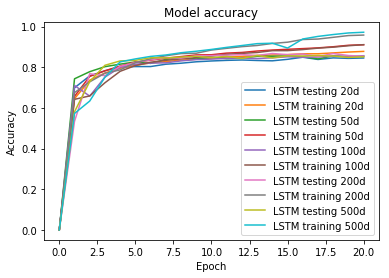

In [2]:
# NLP sentiment analysis
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, SimpleRNN, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras import models, layers

import os
base_dir = 'IMDB_dataset'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
# train_pos = os.path.join(train_dir,'pos')
# train_neg = os.path.join(train_dir,'neg')
# test_pos = os.path.join(test_dir,'pos')
# test_neg = os.path.join(test_dir,'neg')
train_texts = []
train_labels = []
test_texts = []
test_labels = []
for label_type in ['pos','neg']:
  dir_name = os.path.join(train_dir,label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name,fname))
      train_texts.append(f.read())
      f.close()
      if label_type == 'neg':
        train_labels.append(0.0)
      else:
        train_labels.append(1.0)
for label_type in ['pos','neg']:
  dir_name = os.path.join(test_dir,label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name,fname))
      test_texts.append(f.read())
      f.close()
      if label_type == 'neg':
        test_labels.append(0.0)
      else:
        test_labels.append(1.0)
        
# print(f'Length of texts is {len(train_texts)}')
# print(f'Length of labels id {len(train_labels)}')
# print(f'Length of test_texts is {len(test_texts)}')
# print(f'Length of test_labels is {len(test_labels )}')
# for each is 25,000

max_length_list = [20,50,100,200,500]
# max_length = 100
#try 20000
max_words = 10000
#import embedding vector with dimension 50
embedding_dimension = 50
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)
sequences = tokenizer.texts_to_sequences(train_texts)
word_index = tokenizer.word_index
# print(f'Found {len(word_index)} unique tokens.')
# #use all kinds of vocabulary
# max_words = len(word_index)

glove_dir = os.path.join('drive','glove.6B.50d.txt')
embedding_index = {}
f = open(glove_dir)
for line in f:
  values = line.split()
  word = values[0]
  correlation_vector = np.array(values[1:],dtype='float32')
  embedding_index[word] = correlation_vector
f.close()
# print(f'Found {len(embedding_index)} word vectors')
# 400,000 word vectors
# print(embedding_index['great'])
embedding_matrix = np.zeros((max_words,embedding_dimension))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
      
      
# embedding_matrix2 = embedding_matrix.copy()

# print("1",np.sum(embedding_matrix))
# print("2",np.sum(embedding_matrix2))
      
training_times = 20
#should be larger
      
# different state dimension 20,50,100,200,500
units_dic = {0:20,1:50,2:100,3:200,4:500}
max_length = 300
train_data = pad_sequences(sequences,maxlen=max_length)
train_labels = np.array(train_labels)
X_train, X_val, y_train, y_val = train_test_split(train_data,train_labels,test_size=0.2,random_state=50)
model = []
history = []
for num in range(5):
  model.append(models.Sequential())

#   model[num] = models.Sequential()
  model[num].add(layers.Embedding(max_words,embedding_dimension,input_length=max_length))
  model[num].add(layers.LSTM(units=units_dic[num],return_sequences=False))
  model[num].add(layers.Dense(1,activation='sigmoid'))
  model[num].summary()
  model[num].layers[0].set_weights([embedding_matrix])
  model[num].layers[0].trainable = False
  model[num].compile(optimizer='Adam',loss='mean_squared_error',metrics=['acc'])
  history.append(model[num].fit(X_train,y_train,epochs=training_times,batch_size=100,validation_data=(X_val,y_val)))

  plt.plot([0.0]+history[num].history['val_acc'],'-',label="LSTM testing "+str(units_dic[num])+"d")
  plt.plot([0.0]+history[num].history['acc'],'-',label="LSTM training "+str(units_dic[num])+"d")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# model.save_weights("model_weights.h5")

In [1]:
!rm -rf *
!git clone https://github.com/RichardChangCA/IMDB_dataset.git
!ls IMDB_dataset/


!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

!ls drive

Cloning into 'IMDB_dataset'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 98504 (delta 1), reused 8 (delta 1), pack-reused 98496
Receiving objects: 100% (98504/98504), 95.63 MiB | 20.20 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (200029/200029), done.
aclImdb		   glove.6B.50d.txt  imdb.vocab  test
glove.6B.100d.txt  imdbEr.txt	     README	 train
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.13-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL